In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from typing import List, Tuple, Optional

In [2]:
class OrderStatistics:
    def __init__(self, data: np.ndarray):
        """
        Initialize with data and compute basic order statistics
        
        Args:
            data: 1D array of observations
        """
        self.data = np.array(data)
        self.n = len(data)
        self.ordered = np.sort(data)
        self._compute_quartiles()
    
    def _compute_quartiles(self):
        """Compute quartiles and IQR"""
        self.q1 = np.percentile(self.data, 25)
        self.q3 = np.percentile(self.data, 75)
        self.iqr = self.q3 - self.q1
        self.median = np.median(self.data)
    
    def get_order_statistic(self, r: int) -> float:
        """
        Get the r-th order statistic
        
        Args:
            r: position (1-based index)
        Returns:
            r-th order statistic
        """
        if r < 1 or r > self.n:
            raise ValueError(f"r must be between 1 and {self.n}")
        return self.ordered[r-1]
    
    def plot_distribution(self):
        """Plot the distribution of data with order statistics markers"""
        plt.figure(figsize=(12, 6))
        
        # Distribution plot
        sns.histplot(self.data, stat='density', alpha=0.3)
        sns.kdeplot(self.data, color='blue')
        
        # Add vertical lines for key order statistics
        plt.axvline(self.q1, color='r', linestyle='--', label='Q1')
        plt.axvline(self.median, color='g', linestyle='--', label='Median')
        plt.axvline(self.q3, color='r', linestyle='--', label='Q3')
        plt.axvline(self.ordered[0], color='purple', linestyle=':', label='Min')
        plt.axvline(self.ordered[-1], color='purple', linestyle=':', label='Max')
        
        plt.title('Distribution with Order Statistics')
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
    
    def plot_ordered_values(self):
        """Plot ordered values with key statistics"""
        plt.figure(figsize=(12, 6))
        
        # Plot ordered values
        plt.plot(range(1, self.n + 1), self.ordered, 'b.-', label='Ordered Values')
        
        # Add horizontal lines for quartiles
        plt.axhline(self.q1, color='r', linestyle='--', label='Q1')
        plt.axhline(self.median, color='g', linestyle='--', label='Median')
        plt.axhline(self.q3, color='r', linestyle='--', label='Q3')
        
        plt.title('Ordered Values Plot')
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
    
    def box_plot(self):
        """Create a box plot of the data"""
        plt.figure(figsize=(8, 6))
        sns.boxplot(y=self.data)
        plt.title('Box Plot with Order Statistics')
        plt.ylabel('Value')
        plt.grid(True, alpha=0.3)
        plt.show()


In [3]:
class OrderStatisticsSimulation:
    """Class for simulating and visualizing order statistics properties"""
    
    def __init__(self, distribution='normal', params=None):
        """
        Initialize simulation with specified distribution
        
        Args:
            distribution: type of distribution ('normal', 'uniform', 'exponential')
            params: parameters for the distribution
        """
        self.distribution = distribution
        self.params = params or {}
        
    def generate_sample(self, n: int) -> np.ndarray:
        """Generate random sample from specified distribution"""
        if self.distribution == 'normal':
            return np.random.normal(
                loc=self.params.get('mu', 0),
                scale=self.params.get('sigma', 1),
                size=n
            )
        elif self.distribution == 'uniform':
            return np.random.uniform(
                low=self.params.get('low', 0),
                high=self.params.get('high', 1),
                size=n
            )
        elif self.distribution == 'exponential':
            return np.random.exponential(
                scale=self.params.get('scale', 1),
                size=n
            )
    
    def simulate_order_statistic_distribution(self, n: int, r: int, n_simulations: int = 1000):
        """
        Simulate the distribution of the r-th order statistic
        
        Args:
            n: sample size
            r: order statistic position
            n_simulations: number of simulations
        """
        order_stats = []
        for _ in range(n_simulations):
            sample = self.generate_sample(n)
            order_stats.append(np.sort(sample)[r-1])
        
        plt.figure(figsize=(12, 6))
        
        # Plot the distribution of r-th order statistic
        sns.histplot(order_stats, stat='density', alpha=0.3)
        sns.kdeplot(order_stats, color='blue')
        
        plt.title(f'Distribution of {r}-th Order Statistic (n={n})')
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.grid(True, alpha=0.3)
        plt.show()

In [4]:
def demonstrate_concepts():
    """Demonstrate order statistics concepts with examples"""
    
    # Generate sample data
    np.random.seed(42)
    data = np.random.normal(loc=10, scale=2, size=100)
    
    # Create OrderStatistics object
    os = OrderStatistics(data)
    
    print("Basic Order Statistics:")
    print(f"Minimum (1st order statistic): {os.get_order_statistic(1):.2f}")
    print(f"Q1: {os.q1:.2f}")
    print(f"Median: {os.median:.2f}")
    print(f"Q3: {os.q3:.2f}")
    print(f"Maximum (nth order statistic): {os.get_order_statistic(os.n):.2f}")
    print(f"IQR: {os.iqr:.2f}")
    
    # Create visualizations
    print("\nGenerating plots...")
    os.plot_distribution()
    os.plot_ordered_values()
    os.box_plot()
    
    # Simulate order statistics
    print("\nSimulating order statistics distributions...")
    sim = OrderStatisticsSimulation('normal', {'mu': 10, 'sigma': 2})
    
    # Simulate distribution of median for n=100
    sim.simulate_order_statistic_distribution(n=100, r=50)



Basic Order Statistics:
Minimum (1st order statistic): 4.76
Q1: 8.80
Median: 9.75
Q3: 10.81
Maximum (nth order statistic): 13.70
IQR: 2.01

Generating plots...


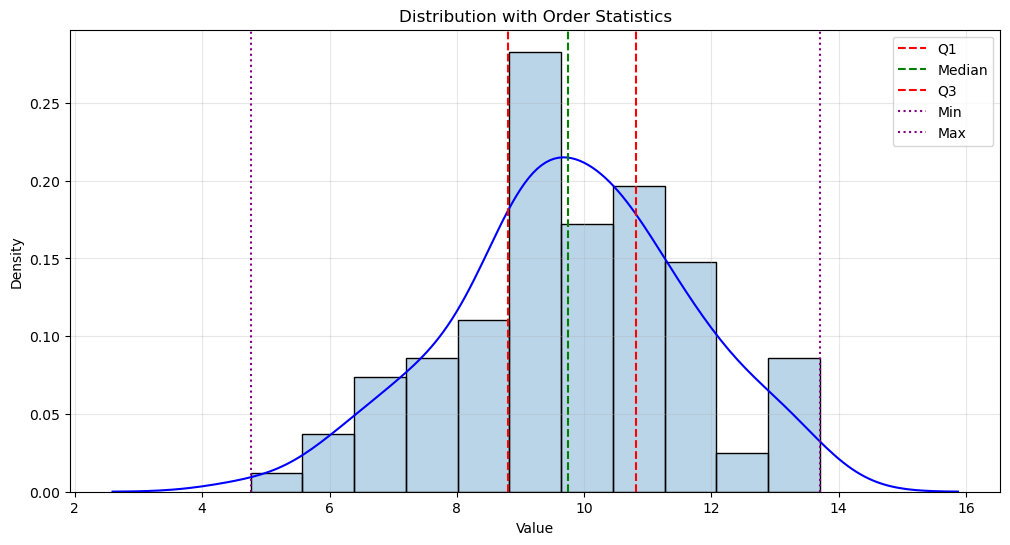

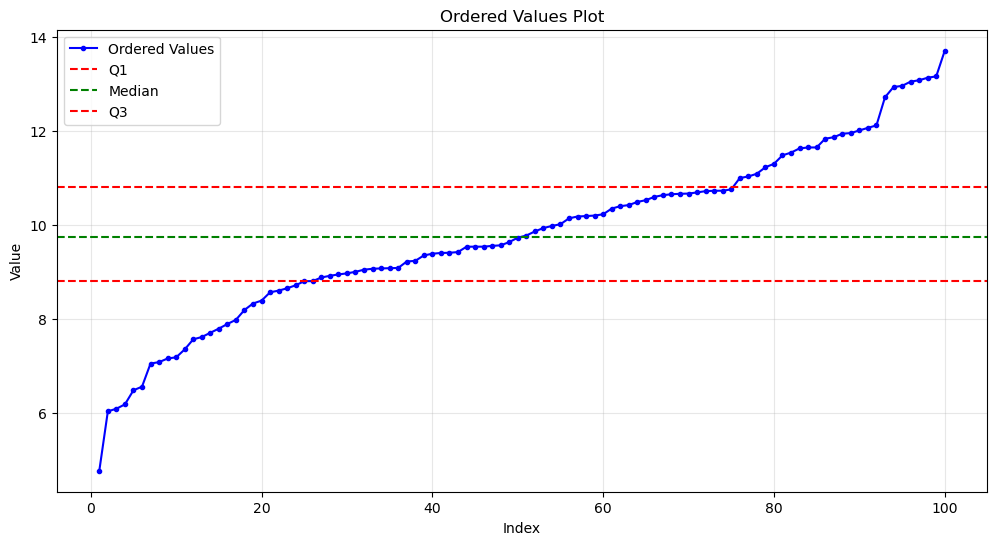

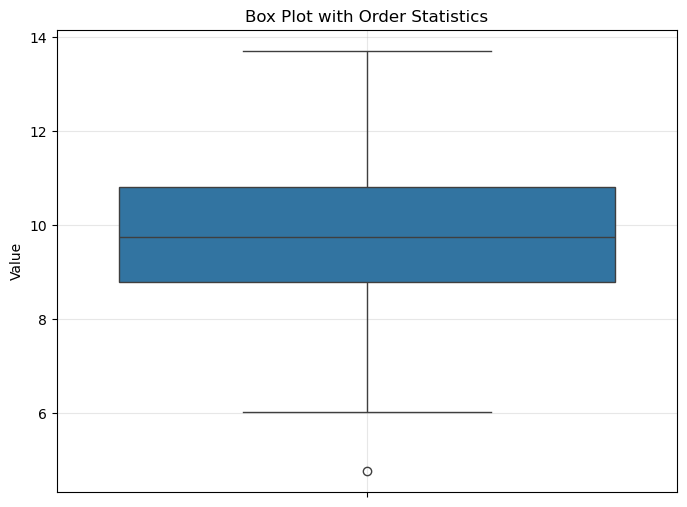


Simulating order statistics distributions...


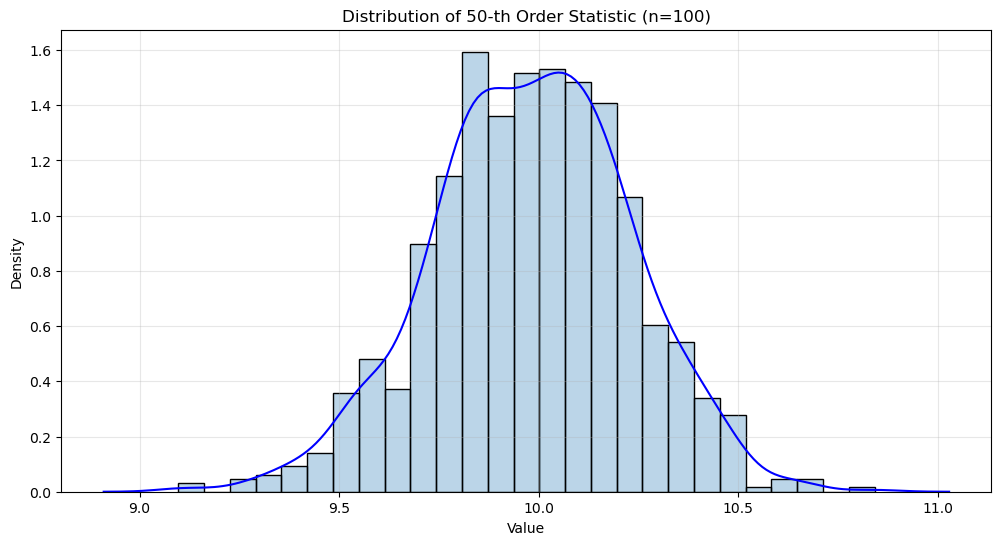

In [5]:

if __name__ == "__main__":
    demonstrate_concepts()

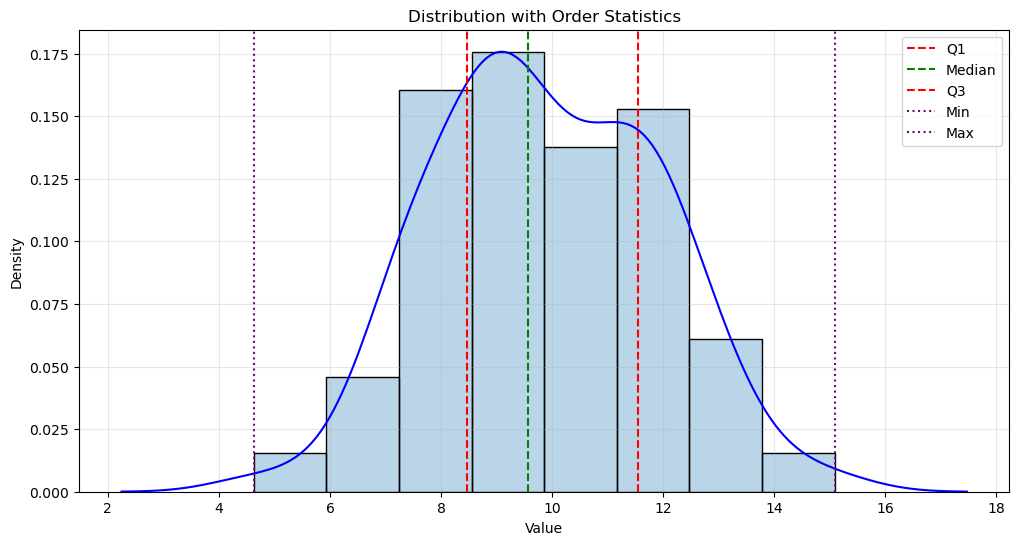

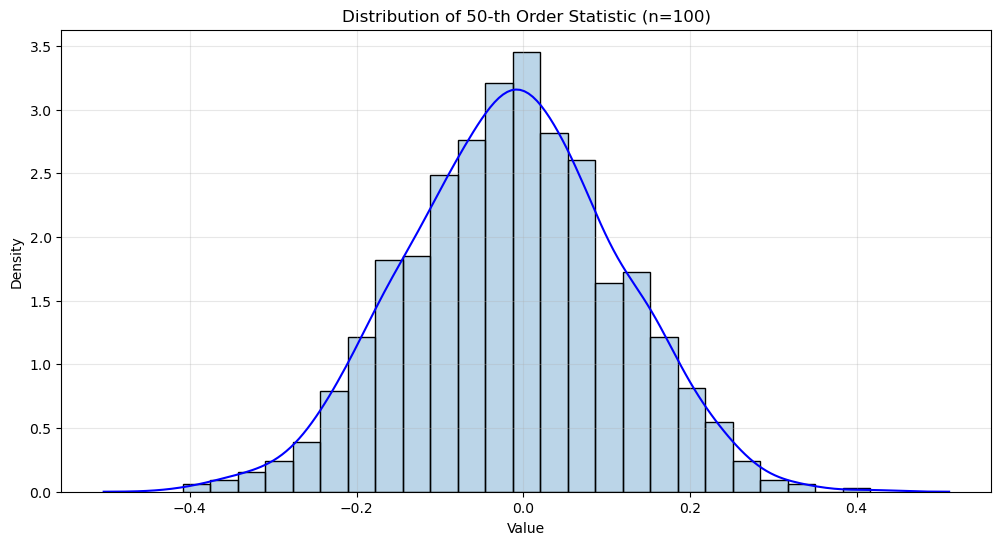

In [6]:
# Basic usage
data = np.random.normal(loc=10, scale=2, size=100)
os = OrderStatistics(data)
os.plot_distribution()

# Simulation
sim = OrderStatisticsSimulation('normal', {'mu': 0, 'sigma': 1})
sim.simulate_order_statistic_distribution(n=100, r=50)  # Distribution of median